In [1]:
##############################################################################################################
# DESCRIPTION: 
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################

IMG_PATH = "C:/TFMDataset/256_0100_1000/work-2-filtered/"
#IMG_PATH = "D:/UNIR/TFM/Docs/NoiseCorrec/NoiseCorrec_0100_1000/TIFF/work/divided_64x64/filtered/work/"

IMG_PATH_VALID = IMG_PATH + "validation/"
IMG_PATH_TEST = IMG_PATH + "test/"
IMG_PATH_TRAIN = IMG_PATH

class HyperParams:
    pass
hyperparams = HyperParams()

hyperparams.IMG_WIDTH = 256
hyperparams.IMG_HEIGHT = 256
hyperparams.EPOCHS = 50
hyperparams.BATCH_SIZE = 32

PERC_TRAIN = 0.8

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0898
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.3248

from tensorflow.keras.optimizers import Adam
hyperparams.OPTIMIZER = Adam(0.0005,beta_1=0.9)

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils
import TrainModel as train
import ReportsH as reports

In [4]:
##################
# MODEL DEFINITION
##################

import AEConnectionsD as model_factory

model = model_factory.buildModel(hyperparams)
model.summary()
model.optimizer.get_config()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 256, 256, 32) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 64) 18496       leaky_re_lu[0][0]                
______________________________________________________________________________________________

{'name': 'Adam',
 'learning_rate': 0.0005,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [5]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid = dsutils.readDataset( IMG_PATH_TRAIN, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
val_noisy_files, val_nitid_files, val_noisy, val_nitid = dsutils.readDataset( IMG_PATH_VALID, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid = dsutils.reshapeDataset( train_noisy, train_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
val_noisy, val_nitid = dsutils.reshapeDataset( val_noisy, val_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

Read dataset. Path: C:/TFMDataset/256_0100_1000/work-2-filtered/
Noisy files:606
Nitid files:606
Read dataset. Path: C:/TFMDataset/256_0100_1000/work-2-filtered/validation/
Noisy files:148
Nitid files:148


In [6]:
##################
# TRAIN MODEL
##################
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)


hist = train.fit( model, hyperparams, train_noisy, train_nitid, val_noisy, val_nitid )

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6

Epoch 1/50
19/19 [==============================] - 13s 286ms/step - loss: 0.0468 - mean_squared_error: 0.0468 - val_loss: 0.1096 - val_mean_squared_error: 0.1096
Epoch 2/50
19/19 [==============================] - 2s 123ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0610 - val_mean_squared_error: 0.0610
Epoch 3/50
19/19 [==============================] - 2s 124ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0377 - val_mean_squared_error: 0.0377
Epoch 4/50
19/19 [==============================] - 2s 124ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 5/50
19/19 [==============================] - 2s 124ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 6/50
19/19 [===========

Epoch 48/50
19/19 [==============================] - 2s 125ms/step - loss: 4.4052e-04 - mean_squared_error: 4.4052e-04 - val_loss: 6.2182e-04 - val_mean_squared_error: 6.2182e-04
Epoch 49/50
19/19 [==============================] - 2s 125ms/step - loss: 4.5068e-04 - mean_squared_error: 4.5068e-04 - val_loss: 8.2925e-04 - val_mean_squared_error: 8.2925e-04
Epoch 50/50
19/19 [==============================] - 2s 124ms/step - loss: 4.6448e-04 - mean_squared_error: 4.6448e-04 - val_loss: 6.0331e-04 - val_mean_squared_error: 6.0331e-04
Train size:606
Valid.size:148
--- 128.8407757282257 seconds ---


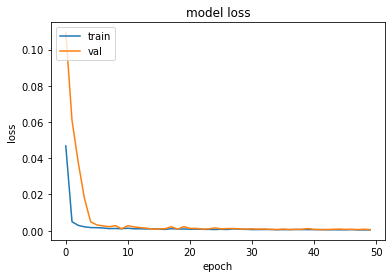

In [7]:
##################
# REPORTS
##################
reports.plotHistory( hist )

In [8]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.01
reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD  )

IndexError: string index out of range

In [ ]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid = dsutils.readDataset( IMG_PATH_TEST, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
test_noisy, test_nitid = dsutils.reshapeDataset( test_noisy, test_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
test_indexes = np.arange(0,test_noisy.shape[0])

predictions = reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, test_indexes, 
                                      ACCURACY_THRESHOLD, radiance_limits.nitid_max, True )

In [9]:
model.save('C:/Users/rdelasheras/TFMJupyter/saves/0100_1000-256-aeconnect-a')

INFO:tensorflow:Assets written to: C:/Users/rdelasheras/TFMJupyter/saves/0100_1000-256-aeconnect-a\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
